- 2_financial_analysis.ipynb

## 응답 데이터 정보
- basDt 기준일자
- crno 법인등록번호
- curCd 통화 코드 (KRW)
- bizYear 사업연도
- fnclDcd 재무제표구분코드
- fnclDcdNm 재무제표구분코드명
- acitId 계정과목ID
- acitNm 계정과목명
- thqrAcitAmt 당분기계정과목금액
- crtmAcitAmt 당기계정과목금액
- lsqtAcitAmt 전분기계정과목금액
- pvtrAcitAmt 전기계정과목금액
- bpvtrAcitAmt 전전기계정과목금액

In [ ]:
# financial_ss.csv 파일을 읽어서 DataFrame 에 저장
import pandas as pd

df = pd.read_csv('financial_ss.csv')
# df.info()
df.head()
# => 첫번째 컬럼 데이터가 인덱스로서 사용되는 값으로 확인

df = pd.read_csv('financial_ss.csv', index_col=0)
df.head()
# => index_col=0 : 첫번째(위치)를 인덱스로 선택하겠다.

# 컬럼별 데이터 타입 => dtypes
df.dtypes

# '기준일자' 컬럼(basDt) 타입을 Datetime으로 변경
# pd.to_datetime(대상) => '대상' 숫자 타입인 경우 ___ ??
# df['basDt'] = pd.to_datetime(df['basDt'], format='ISO8601')   # 국제표준(yyyy-mm-dd)
df['basDt'] = pd.to_datetime(df['basDt'], format='%Y%m%d')

,basDt,crno,bizYear,fnclDcd,fnclDcdNm,acitId,acitNm,thqrAcitAmt,crtmAcitAmt,lsqtAcitAmt,pvtrAcitAmt,bpvtrAcitAmt,curCd
0,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_Assets,자산총계,0,242179521000000,0,230422958000000,214075018000000,KRW
1,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_CurrentAssets,유동자산,0,124814725000000,0,115146026000000,110760271000000,KRW
2,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_CurrentLiabilities,유동부채,0,50502909000000,0,52013913000000,51315409000000,KRW
3,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_Equity,자본총계,0,179059805000000,0,168088188000000,150016010000000,KRW
4,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_Liabilities,부채총계,0,63119716000000,0,62334770000000,64059008000000,KRW


In [36]:
# 재무제표구분코드명(fnclDcdNm) 컬럼의 고유값 목록 확인
df['fnclDcdNm'].unique()

# 위 컬럼 데이터 중 연결재무제표 데이터만 선택
# * contains 함수 사용
# df[df['fnclDcdNm'].str.contains('연결재무제표')]

# * [member] 제거하고, 공백 제거하여 '연결재무제표' 선택
df['fnclDcdNm_main'] = df['fnclDcdNm'].str.replace('[member]','').str.strip()
df = df[df['fnclDcdNm_main'] == '연결재무제표']

In [38]:
# 기준일자 컬럼으로 오름차순 정렬. 인덱스행 초기화.
df = df.sort_values(by='basDt').reset_index(drop=True)

In [39]:
# 계정과목명(acitNm) 컬럼의 고유값 확인
df['acitNm'].unique()

array(['자산총계', '유동자산', '유동부채', '자본총계', '부채총계', '비유동자산', '비유동부채',
       '이익잉여금(결손금)', '자본금', '이익잉여금'], dtype=object)

([<matplotlib.patches.Wedge at 0x188d41510d0>,
 [Text(0.785563278116679, 0.8398751907721632, '부채총계'),
  Text(-0.7514084264010633, -0.8033588094578151, '자본총계')],
 [Text(0.4440140267616011, 0.4747120643494835, '26.1%'),
  Text(-0.4098591416733072, -0.4381957142497173, '73.9%')])

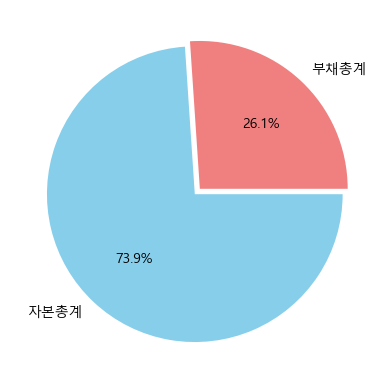

In [ ]:
# 계정과목이 '부채총계', '자본총계'인 데이터의 당기계정과목금액(crtmAcitAmt) 시각화
# '부채총계'
acit_0 = df[ df['acitNm'] == '부채총계' ]
acit_0_amt = acit_0['crtmAcitAmt']

data0 = acit_0_amt.iloc[0]

# '자본총계'
data1 = df[ df['acitNm'] == '자본총계' ]['crtmAcitAmt'].iloc[0]

import matplotlib.pyplot as plt
plt.rc('font', family='malgun Gothic') # 한글 설정
plt.figure()
plt.pie([data0, data1], labels=['부채총계', '자본총계'], autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], explode=(0.05, 0))

([<matplotlib.patches.Wedge at 0x188d41f8a90>,
 [Text(0.6394950316098548, 0.9557960580303264, '부채총계'),
  Text(-0.6116908198753515, -0.9142397611568972, '자본총계')],
 [Text(0.3614537135186135, 0.5402325545388801, '31.2%'),
  Text(-0.333649538113828, -0.4986762333583075, '68.8%')])

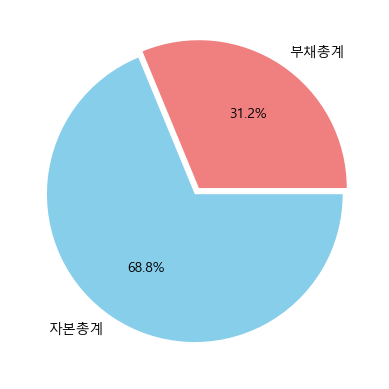

In [45]:
# 부채 총계, 자본 총계 -- 당기금액 총합을 시각화
# '부채총계'
acit_0 = df[ df['acitNm'] == '부채총계' ]
acit_0_amt = acit_0['crtmAcitAmt']


data0 = acit_0_amt.sum()  #부채총계의 총합

# '자본총계'
data1 = df[ df['acitNm'] == '자본총계' ]['crtmAcitAmt'].sum()
plt.pie([data0, data1], labels=['부채총계', '자본총계'], autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], explode=(0.05, 0))

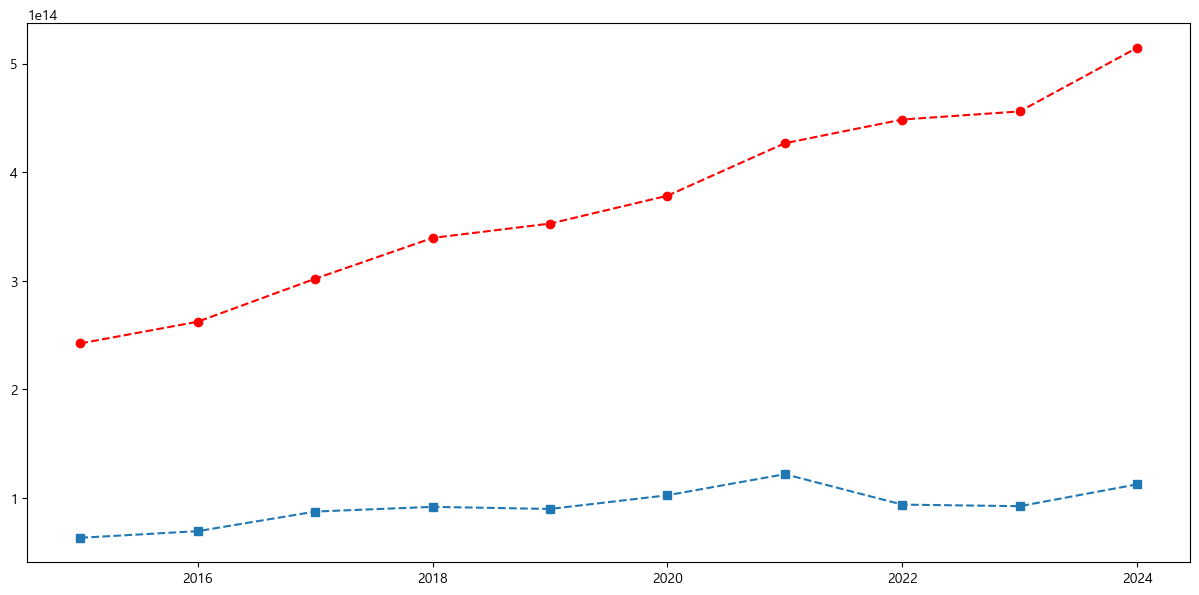

In [59]:
# '자산 총계'의 당기 금액을 연도별로 시각화
data = df[ df['acitNm'] == '자산총계' ].groupby('bizYear')['crtmAcitAmt'].sum()
data2 = df[ df['acitNm'] == '부채총계' ].groupby('bizYear')['crtmAcitAmt'].sum()

plt.figure(figsize=(15,7))
plt.plot(data, marker='o', linestyle='--', color='red')
# plt.bar(x=data.index, height=data)
plt.plot(data2, marker='s', linestyle='--')